## Chapter 8: Evaluation metrics and model selection - Regression

Python and sklearn version used for this notebook

In [5]:
import sys

# Print the version of Python
print(sys.version)

3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


In [6]:
import sklearn

# Print the version of scikit-learn
sklearn_version = sklearn.__version__
sklearn_version


'1.2.2'

In [7]:
assert sys.version_info >= (3, 11) 

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.2.2")

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Creating the regression dataset

In [53]:
from sklearn.datasets import make_regression
import pandas as pd

# Configurable parameters for dataset generation
n_samples = 1000  # Number of samples
n_features = 2   # Number of features
noise_level = 2  # Noise in the dataset

# Generating the dataset
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise_level, random_state=42)

# Converting to a Pandas DataFrame for ease of use
df_X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
df_y = pd.DataFrame(y, columns=['target'])

# Combining features and target into a single DataFrame
synthetic_dataset = pd.concat([df_X, df_y], axis=1)


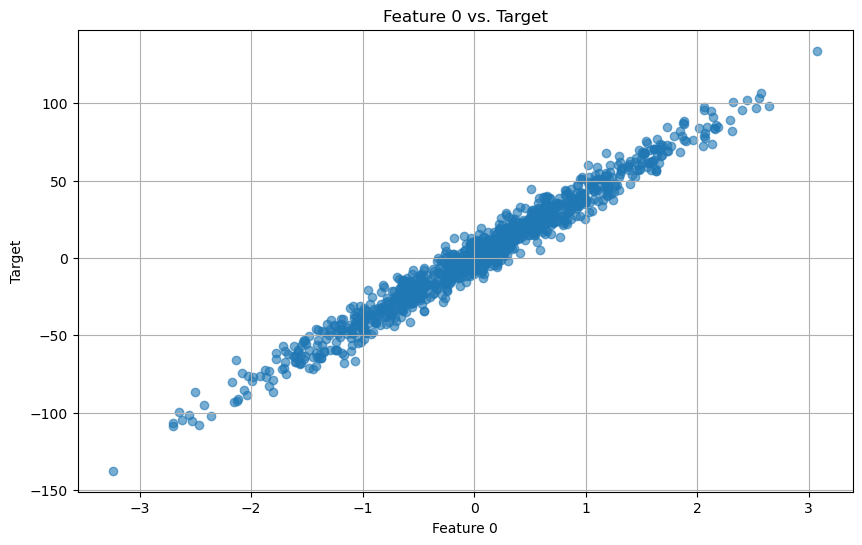

In [54]:
import matplotlib.pyplot as plt

# Plotting feature against target for the synthetic dataset
# Selecting the first feature for demonstration
plt.figure(figsize=(10, 6))
plt.scatter(df_X['feature_0'], df_y['target'], alpha=0.6)
plt.title('Feature 0 vs. Target')
plt.xlabel('Feature 0')
plt.ylabel('Target')
plt.grid(True)
plt.show()



### Applying Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

### Evaluation metrics for Regression

In [56]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 1.6051


In [57]:
# MSE and RMSE

from sklearn.metrics import mean_squared_error

import numpy as np

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 4.1272
Root Mean Squared Error (RMSE): 2.0316


In [58]:
# RMSLE

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

y_train = np.abs(y_train).to_numpy().ravel()
y_test = np.abs(y_test).to_numpy().ravel()

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.4f}")


Root Mean Squared Logarithmic Error (RMSLE): 0.2256


In [59]:
# R-squared and Adjusted R-squared

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Assuming df_X and df_y are features and target of our synthetic dataset

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-Squared
r_squared = r2_score(y_test, y_pred)
print(f"R-Squared: {r_squared:.4f}")

# Calculate Adjusted R-Squared
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(f"Adjusted R-Squared: {adjusted_r_squared:.4f}")


R-Squared: 0.9974
Adjusted R-Squared: 0.9973
